# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/22
* Student Name: Bella Samper
* Student Net ID: dad5bq
* This URL: https://github.com/bellasamper/Montecarlo_Simulator/blob/main/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/bellasamper/Montecarlo_Simulator

# The Monte Carlo Module

In [9]:
# A code block with your classes.
import pandas as pd
import numpy as np
import random

class Die:
    '''
    PURPOSE: Takes a die object that has N sides (faces) and W weights and rolls the object
    
    FUNCTIONS: 
    change_the_weight() 
       Checks to see if the face and weight passed is valid and allows you change the weight of a specific face of the die object 
    
    roll() function 
        Does a random sample from the vector of faces accoring to the weights
    
    show() function 
        Returns the current set of faces and weights in a dataframe
   
    '''
    def __init__(self, faces):
        '''
        PURPOSE: Constructs all the necessary attributes for the Die class

        INPUTS
        faces   an array of faces
        '''

        self.faces = faces 
        weights = np.ones(len(faces))
        self._facesFrame = pd.DataFrame(weights, columns = ['weights'], index = faces)
        
    def change_the_weight(self, face_value, new_weight):
        
      
        '''
        PURPOSE: Checks to see if the face passed is valid and checks to see if the weight is valid, then changes the weight of a specifice face 

        INPUTS
        face_value   int 
        new_weight   int
        
        OUTPUT
        self._facesFrame   Dataframe of the faces and weights
        '''
        self._facesFrame.loc[face_value,['weights']] = new_weight
        
        
        
        
    def roll(self, num_rolls=1):
        '''
        PURPOSE: Roll the die one or more times

        INPUTS
        num_rolls   defaults to 1
        
        OUTPUT
        outcomes    list of the rolls
        '''
        
        outcomes = random.choices(self._facesFrame.index, weights= self._facesFrame['weights'], k=num_rolls)
        return list(outcomes)
    
    def show(self):
        '''
        PURPOSE: Show the user the die's current set of faces and weights
        
        OUTPUT
        self._facesFrame   DataFrame of the current set of faces and weights
        '''
        
        return self._facesFrame

        

class Game():
    '''
     A game consists of rolling of one or more dice of the same kind one or more times.
     
     FUNCTIONS
     play()
        Rolls the dice a number of times given 
        
     show() 
        shows the user th results of the most recent play
    '''
    
    def __init__(self, Die_List):
        '''
        PURPOSE: Constructs all the necessary attributes for the Game class

        INPUTS
        Die_List    list of instantiated similar die objects

        OUTPUT
        None
        '''
        
        self.Die_list = Die_List
        return None
    
    def play(self, times_rolled):
        '''
        PURPOSE: Rolls the dice the number of times given

        INPUTS
        times_rolled    number

        OUTPUT
        self._play_df    Private Dataframe of rolls and dice
        '''
        
        
        self._play_df = pd.DataFrame()
        
        for i in range(len(self.Die_list)):
            rolled = pd.DataFrame(self.Die_list[i].roll(times_rolled), columns = [i+1], index = range(1, times_rolled +1))
            self._play_df = (pd.concat([self._play_df, rolled], axis = 1))
            
        self._play_df.index.name = 'Roll Number'
        
        return self._play_df
    
    def show(self, wide = True):
        
        '''
        PURPOSE: Shows the user the results of the most recent play in narrow or wide formate

        INPUTS
        Wide      boolean - default is True 

        OUTPUT
        narrow_df       Dataframe in narrow format 
        self._play_df   Dataframe in wide format 
        '''
        
        if wide == False: 
            narrow_df = pd.DataFrame(self._play_df.stack()) 
            narrow_df.columns = {'faces'}
            return narrow_df
            
        else: 
            return self._play_df
        
        
        
class Analyzer:
    '''
    Takes the results of a single game and computes various descriptive statistical properites about it
    
    FUNCTIONS 
        jackpot() counts how many times a roll resulted in all faces being the same 
        
        combo() counts how many combination types of faces were rolled and their counts 
        
        face_counts_per_roll() the number of times a given face appeared in each roll
        
    '''
    
    def __init__(self, game_object):
        
        '''
        PURPOSE: Constructs all the necessary attributes for the Analyzer class

        INPUTS
        game_object    Dataframe 

        '''
        
        self.game_object = game_object
        self.game = self.game_object.show()
        # Checks to see what type it is 
        faces_type = type(self.game[1]) 
        
    def jackpot(self):
        
        '''
        PURPOSE: Computes how many times the game resulted in all faces being identical


        OUTPUT
        len(self.booleans[self.booleans == True])     int
        '''
       
        self.booleans = self.game.nunique(axis = 1).eq(1)
        return len(self.booleans[self.booleans == True])
    
    def combo(self):
        
        '''
        PURPOSE: Computes the distinct combinations of faces rolled, along with their counts

        '''
        
        self.combo_df = self.game.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('Counts')
        
    
    def face_counts_per_roll(self):
        
        '''
        PURPOSE: Computes how many times a given face is rolled in each event

        '''
        
        self.face_counts = (self.game.apply(pd.Series.value_counts, axis=1).fillna(0)).astype(int)
        

# Test Module

In [ ]:
# A code block with your Test Module
import unittest
from Montecarlo import *


class DieTestSuite(unittest.TestCase):
    
    '''
    DieTestSuite tests the Die class to see if all the functions within it work
    
    '''
    
    def test_1_change_the_weight(self):
        '''
        test_1_change_the_weight tests the function change_the_weight() from the Die class which changes the weight of one of the faces. This test tests to see if the new weight in the dataframe is right 
        '''
        
        die1.change_the_weight(5, 6.0)
        
        expected = 6.0
                
        self.assertEqual(die1.show()['weights'][5], expected)

    def test_2_roll(self):
        '''
        test_2_roll tests the function roll() from the Die class which rolls the die a certain number of times. It is testing the length of the dataframe to make sure it is the length of how many rolls it was given
        '''
        
        length = len(die1.roll(10))
        
        expected = 10
        
        self.assertEqual(length, expected)
        
    def test_3_show(self):
        '''
        test_3_show tests the function show() from the Die class which shows the dataframe with the current weights and faces. It is testing to see if the dimensions of the dataframe is right accoring to the number of faces on a die
        '''
        
        df = die1.show()
        
        expected = [6,1]
        
        self.assertEqual(list(df.shape), expected)

        
        
class GameTestSuite(unittest.TestCase):
    
    '''
    GameTestSuite tests the Game class to see if all the functions within it work
    
    '''
    
    def test_1_play(self):
        '''
        test_1_play tests the function play() from class Game which rolls the dice the number of times it is given. It is testing to see if the length of the dataframe is the number of times it has been played.
        '''
        
        game1 = Game([die1, die1, die1])
        df = game1.play(15)
        
        expected = 15
        
        self.assertEqual(len(df[1]), expected)
        
        
    def test_2_show(self):
        '''
        test_2_show tests the function show() from the class Game which shows the dataframe of the the most recent plays. It is testing to see if the length of the dataframe is the number of times it has been played
        '''
        
        game1 = Game([die1, die1, die1])
        game1.play(15)
        df = game1.show()
        
        expected = 15
        
        self.assertEqual(len(df[1]), expected)
        
        
class AnalyzerTestSuite(unittest.TestCase):
    
    '''
    AnalyzerTestSuite tests the Analyzer class to see if all the functions within it work
    
    '''
    
    def test_1_jackpot(self):
        
        '''
        test_1_jackpot tests the function jackpot() from the class Analyzer which computes how many times the game resulted in all faces being identical. It is testing to see if the number of jackpots is greater than 0 since it is played 10000 times
        '''
        
        game1 = Game([die1, die1, die1])
        game1.play(10000)
        analyzer1 = Analyzer(game1)
        num = analyzer1.jackpot()
        
        self.assertNotEqual(num, 0)
        
    def test_2_combo(self):
        
        '''
        test_2_combo tests the function combo() from the class Analyzer which computes the distinct combinations of faces rolled, along with their counts. It is testing if the sum of the counts of each combination equals the number of times played.
        '''
        
        game1 = Game([die1, die1, die1])
        game1.play(10000)
        analyzer1 = Analyzer(game1)
        analyzer1.combo()
        sums = analyzer1.combo_df["Counts"].sum()
        
        self.assertEqual(sums, 10000)
        
    def test_3_face_counts_per_roll(self):
        
        '''
        test_3_face_counts_per_roll test the function face_counts_per_rool from the class Analyzer which computes how many times a given face is rolled in each event. It is testing if the length of the dataframe is equal to the number of times it has been played. 
        '''
        
        game1 = Game([die1, die1, die1])
        game1.play(10000)
        analyzer1 = Analyzer(game1)
        analyzer1.face_counts_per_roll()
        
        expected = 10000
        
        self.assertEqual(len(analyzer1.face_counts), expected)
        

if __name__ == '__main__':
    die1 = Die([1,2,3,4,5,6])
    unittest.main(verbosity=3)

# Test Results

In [ ]:
# A text block with the output of a successful test.
PS C:\Users\bella\Documents\Project> python Montecarlo_Tests.py >> Montecarlo_Tests.txt
test_1_jackpot (__main__.AnalyzerTestSuite) ... ok
test_2_combo (__main__.AnalyzerTestSuite) ... ok
test_3_face_counts_per_roll (__main__.AnalyzerTestSuite) ... ok
test_1_change_the_weight (__main__.DieTestSuite) ... ok
test_2_roll (__main__.DieTestSuite) ... ok
test_3_show (__main__.DieTestSuite) ... ok
test_1_play (__main__.GameTestSuite) ... ok
test_2_show (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 4.254s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [10]:
# Code blocks with output
from Montecarlo import *

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [12]:
#Part One: Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
coin = Die(["H", "T"])
coin.change_the_weight("H",5.0)

In [14]:
#Part Two: Play a game of 1000 flips of three coins with all fair dice.
coin1 = Die(["H", "T"])
coin2 = Die(["H", "T"])
coin3 = Die(["H", "T"])
game1 = Game([coin1, coin2, coin3])
game1.play(1000).head()

,1,2,3
Roll Number,,,
1,T,H,T
2,H,T,T
3,H,T,T
4,T,H,H
5,T,H,H


In [16]:
#Part 3: Play a game of 1000 flips with two unfair dice and one fair die.
coin4 = Die(["H", "T"])
coin5 = Die(["H", "T"])
coin6 = Die(["H", "T"])
coin4.change_the_weight("T", 5.0)
coin5.change_the_weight("H", 5.0)
game2 = Game([coin4, coin5, coin6])
game2.play(1000).head()

,1,2,3
Roll Number,,,
1,T,H,T
2,T,T,T
3,T,T,T
4,T,H,H
5,T,T,T


In [17]:
# Part 4 For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
analyze1 = Analyzer(game1)
analyze1.jackpot()

249

In [18]:
analyze2 = Analyzer(game2)
analyze2.jackpot()

132

In [19]:
# Part 5 Compute relative frequency as the number of jackpots over the total number of rolls.
frequency1 = analyze1.jackpot()/len(analyze1.booleans)
frequency2 = analyze2.jackpot()/len(analyze2.booleans)

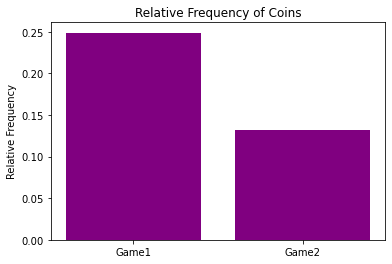

In [20]:
# Part 6 Show your results, comparing the two relative frequencies, in a simple bar chart.
x = ['Game1', 'Game2']
y = [frequency1, frequency2]
plt.bar(x, y, align='center', color = 'Purple')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Coins')

plt.show()

## Scenario 2

In [22]:
# Code blocks with output

Part One: Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [23]:
die1 = Die([1,2,3,4,5,6])
die2 = Die([1,2,3,4,5,6])
die3 = Die([1,2,3,4,5,6])
die1.change_the_weight(6, 5)
die2.change_the_weight(1, 5)

Part 2:  Play a game of 10000 rolls with 5 fair dice.

In [24]:
die4 = Die([1,2,3,4,5,6])
die5 = Die([1,2,3,4,5,6])
die6 = Die([1,2,3,4,5,6])
die7 = Die([1,2,3,4,5,6])
die8 = Die([1,2,3,4,5,6])
die_game1 = Game([die4, die5, die6, die7, die8])
die_game1.play(10000).head()

,1,2,3,4,5
Roll Number,,,,,
1,1,3,6,2,6
2,3,2,4,1,3
3,6,3,5,1,3
4,4,6,3,6,3
5,5,4,6,5,4


Part 3 Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [25]:
die_game2 = Game([die1, die1, die2, die4, die5])
die_game2.play(10000).head()

,1,2,3,4,5
Roll Number,,,,,
1,4,6,1,4,4
2,6,1,1,1,4
3,3,4,1,1,2
4,2,6,6,5,3
5,6,6,2,6,5


Part 4 For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [27]:
fair_dice = Analyzer(die_game1)
unfair_dice = Analyzer(die_game2)
print(fair_dice.jackpot())
print(unfair_dice.jackpot())
rel_frequency1 = fair_dice.jackpot()/len(fair_dice.booleans)
rel_frequency2 = unfair_dice.jackpot()/len(unfair_dice.booleans)
print(rel_frequency1, rel_frequency2)

9
8
0.0009 0.0008


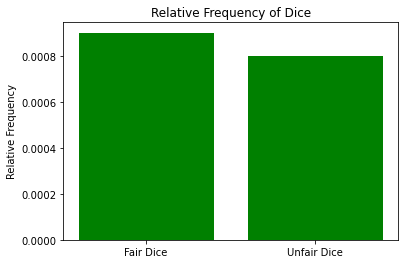

In [28]:
x = ['Fair Dice', 'Unfair Dice']
y = [rel_frequency1, rel_frequency2]
plt.bar(x, y, align='center', color = 'Green')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Dice')

plt.show()

Part 5 Compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [29]:
fair_dice.combo()
df10 = fair_dice.combo_df
df10 = df10[:10]
print(df10)

           Counts
0 1 2 3 4        
2 3 4 5 6     166
1 2 3 5 6     159
  3 4 5 6     156
  2 3 4 6     156
        5     155
    4 5 6     152
  1 3 4 6     100
  2 2 3 4      96
    3 6 6      95
2 3 5 5 6      93


In [30]:
indices = pd.DataFrame(df10.index)
index_list = []
for i in range(10):
    index_list.append((str(indices[0][i])).replace(', ',''))

df10['index_list'] = index_list
df10

<ipython-input-30-78ea7607793f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['index_list'] = index_list


Counts index_list
0 1 2 3 4                   
2 3 4 5 6     166    (23456)
1 2 3 5 6     159    (12356)
  3 4 5 6     156    (13456)
  2 3 4 6     156    (12346)
        5     155    (12345)
    4 5 6     152    (12456)
  1 3 4 6     100    (11346)
  2 2 3 4      96    (12234)
    3 6 6      95    (12366)
2 3 5 5 6      93    (23556)

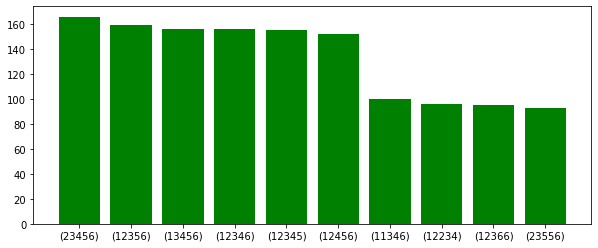

In [31]:
x = list(df10['index_list'].values)
y = list(df10['Counts'].values)
plt.figure(figsize=(10,4))
plt.bar(x, y, color = 'Green')

plt.show()

In [32]:
unfair_dice.combo()
df10 = unfair_dice.combo_df
df10 = df10[:10]
print(df10)

           Counts
0 1 2 3 4        
1 3 5 6 6     223
  2 5 6 6     215
    4 6 6     197
    3 6 6     194
  3 4 6 6     194
  4 5 6 6     190
  2 4 5 6     188
    3 5 6     184
  1 5 6 6     178
    2 6 6     165


In [33]:
indices = pd.DataFrame(df10.index)
index_list = []
for i in range(10):
    index_list.append((str(indices[0][i])).replace(', ',''))

df10['index_list'] = index_list
df10

<ipython-input-33-78ea7607793f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['index_list'] = index_list


Counts index_list
0 1 2 3 4                   
1 3 5 6 6     223    (13566)
  2 5 6 6     215    (12566)
    4 6 6     197    (12466)
    3 6 6     194    (12366)
  3 4 6 6     194    (13466)
  4 5 6 6     190    (14566)
  2 4 5 6     188    (12456)
    3 5 6     184    (12356)
  1 5 6 6     178    (11566)
    2 6 6     165    (11266)

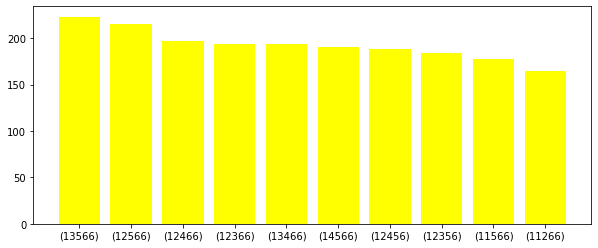

In [34]:
x = list(df10['index_list'].values)
y = list(df10['Counts'].values)
plt.figure(figsize=(10,4))
plt.bar(x, y, color = 'Yellow')

plt.show()

## Scenario 3

In [ ]:
# Code blocks with output

Part One: Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [35]:
alpha = Die(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y','Z'])
dictionary = {'A' : 8.4966,
'B' :  2.0720,
'C' :  4.5388,
'D' :  3.3844,
'E' :  11.1607,
'F' :  1.8121,
'G' : 2.4705,
'H' :  3.0034,
'I' :  7.5448,
'J' :  0.1965,
'K' :  1.1016,
'L' :  5.4893,
'M' :  3.0129,
'N' :  6.6544,
'O' :  7.1635,
'P' :  3.1671,
'Q' :  0.1962,
'R' :  7.5809,
'S' :  5.7351,
'T' :  6.9509,
'U' :  3.6308,
'V' :  1.0074,
'W' :  1.2899,
'X' :  0.2902,
'Y' :  1.7779,
'Z' :  0.2722}

In [36]:
for x in dictionary: 
    alpha.change_the_weight(x, dictionary[x])
alpha.show() 

,weights
A,8.4966
B,2.0720
C,4.5388
D,3.3844
E,11.1607
F,1.8121
G,2.4705
H,3.0034
I,7.5448
J,0.1965


Part Two:  Play a game involving 5 of these dice with 1000 rolls.

In [37]:
alpha_game = Game([alpha, alpha, alpha, alpha, alpha])
alpha_game.play(1000).head()

,1,2,3,4,5
Roll Number,,,,,
1,F,T,C,E,L
2,O,C,S,R,E
3,E,R,A,S,E
4,A,G,T,I,E
5,T,E,A,G,P


Part Three:  How many combos can you that look like actual English words?

In [38]:
alpha_analyzer = Analyzer(alpha_game)
df_alpha = alpha_game.show()
df_alpha["maybe_words"] = df_alpha[1] + df_alpha[2] + df_alpha[3] + df_alpha[4] + df_alpha[5]
df_alpha.head()

,1,2,3,4,5,maybe_words
Roll Number,,,,,,
1,F,T,C,E,L,FTCEL
2,O,C,S,R,E,OCSRE
3,E,R,A,S,E,ERASE
4,A,G,T,I,E,AGTIE
5,T,E,A,G,P,TEAGP


In [39]:
import enchant

In [40]:
dict = enchant.Dict('en_US')

englishword = []
count = 0
for word in df_alpha['maybe_words']:
    if dict.check(word) == True:
        englishword.append(word)
        count = count + 1
print("These combinations are english words : " + str(englishword))
print("The number of english words is: " + str(count))

These combinations are english words : ['ERASE']
The number of english words is: 1


Part 4 Based on your eye count, what is the relative frequency of these words versus the rest?


In [41]:
alpha_frequency = count/len(df_alpha)
alpha_frequency

0.001

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [2]:
!ls -lRF -o

.:
total 172
-rw-r--r-- 1 dad5bq    62 Jul 14 09:53 Directory.py
-rw-r--r-- 1 dad5bq  4596 Jul 11 08:56 FinalProjectSubmissionTemplate.ipynb
-rw-r--r-- 1 dad5bq  1068 Jul 14 09:34 LICENSE
-rw-r--r-- 1 dad5bq 86147 Jul 14 20:04 Montecarlo_demo.ipynb
drwxr-sr-x 2 dad5bq  2048 Jul 14 10:14 Montecarlo.egg-info/
drwxr-sr-x 3 dad5bq  1536 Jul 14 15:39 Montecarlo_Package/
-rw-r--r-- 1 dad5bq  7590 Jul 15 10:20 Montecarlo.pyc
-rw-r--r-- 1 dad5bq  4454 Jul 15 10:25 Montecarlo_Tests.py
-rw-r--r-- 1 dad5bq   579 Jul 14 09:38 Montecarlo_Tests.txt
drwxr-sr-x 2 dad5bq   512 Jul 14 11:00 __pycache__/
-rw-r--r-- 1 dad5bq  9034 Jul 14 20:24 README.md
-rw-r--r-- 1 dad5bq   317 Jul 14 09:43 setup.py

./Montecarlo.egg-info:
total 16
-rw-r--r-- 1 dad5bq   1 Jul 14 10:14 dependency_links.txt
-rw-r--r-- 1 dad5bq 256 Jul 14 10:14 PKG-INFO
-rw-r--r-- 1 dad5bq 218 Jul 14 10:14 SOURCES.txt
-rw-r--r-- 1 dad5bq  19 Jul 14 10:14 top_level.txt

./Montecarlo_Package:
total 16
-rw-r--r-- 1 dad5bq   30 Jul 14 09:39 __i

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [3]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/dad5bq/Documents/MSDS/Montecarlo_Simulator
  Running setup.py develop for Montecarlo
